In [ ]:
DATASET DESCRPTION:

#The Crime Dataset is about Crimes which have taken place in India over the years. 
#This dataset has 600 Rows and 14 Columns, which offers valuable insights for crime-pattern based analysis,policy-making and crime prevention strategies
#The various attributes or features of the dataset are:

#Date Reported: The date on which the crime was officially reported to authorities, aiding in understanding reporting delays and their patterns.

#Date of Occurrence: The actual date when the crime took place, useful for analyzing crime trends over time.

#Time of Occurrence: The specific time when the crime occurred, helping to identify high-risk time periods for various types of crimes.

#City: The city where the crime was reported, enabling geographic crime mapping and regional comparisons.

#Crime Code: A unique identifier or code assigned to each type of crime, facilitating categorical analysis and trend identification.

#Crime Description: A detailed narrative or classification of the crime committed, offering qualitative context for the incident.

#Victim Age: The age of the victim involved, useful for demographic analysis and vulnerability assessments.

#Victim Gender: The gender of the victim, providing insights into gender-specific crime patterns and prevention strategies.

#Weapon Used: Information on the weapon or tools used in the crime, aiding in understanding crime severity and planning countermeasures.

#Crime Domain: The broader category or domain of the crime (e.g., Violent,Traffic Fatality), helping to classify and study crimes within specific areas.

#Police Deployed: The number or type of police personnel involved in responding to or investigating the crime, useful for resource allocation analysis.

#Case Closed: A binary attribute indicating whether the case has been resolved (closed) or is still open, useful for evaluating the efficiency of the judicial and law enforcement processes.


The primary motive for analyzing the crimes dataset is to understand trends, patterns, and demographics of crimes across different regions and timeframes. This helps in identifying high-risk areas, optimizing resource allocation, and developing targeted strategies for crime prevention. Insights can guide policymakers, law enforcement, and public awareness campaigns to enhance safety and reduce crime rates. Additionally, the analysis supports judicial processes by identifying factors influencing case closures and delays. Ultimately, the goal is to use data-driven insights to make communities safer and more informed.

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing the dataset
df = pd.read_csv("C:/Users/Sumit Emmanuel/OneDrive/Desktop/BCA/crimes.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       600 non-null    int64 
 1   Date Reported       600 non-null    object
 2   Date of Occurrence  600 non-null    object
 3   Time of Occurrence  600 non-null    object
 4   City                600 non-null    object
 5   Crime Code          600 non-null    int64 
 6   Crime Description   600 non-null    object
 7   Victim Age          600 non-null    int64 
 8   Victim Gender       600 non-null    object
 9   Weapon Used         511 non-null    object
 10  Crime Domain        600 non-null    object
 11  Police Deployed     600 non-null    int64 
 12  Case Closed         600 non-null    object
 13  Date Case Closed    291 non-null    object
dtypes: int64(4), object(10)
memory usage: 65.8+ KB


In [ ]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

#Numerical Columns: These are columns with numeric data types. They usually represent quantities like age, counts, or measurements.
#Categorical Columns: These are columns with non-numeric data types. They usually represent city names, crime types, or gender 

Dataset Preview:
   Report Number     Date Reported Date of Occurrence Time of Occurrence  \
0              1  02/01/2020 00:00   01/01/2020 00:00   01/01/2020 01:11   
1              2  01/01/2020 19:00   01/01/2020 01:00   01/01/2020 06:26   
2              3  02/01/2020 05:00   01/01/2020 02:00   01/01/2020 14:30   
3              4  01/01/2020 05:00   01/01/2020 03:00   01/01/2020 14:46   
4              5  01/01/2020 21:00   01/01/2020 04:00   01/01/2020 16:51   

        City  Crime Code Crime Description  Victim Age Victim Gender  \
0  Ahmedabad         576    IDENTITY THEFT          16             M   
1    Chennai         128          HOMICIDE          37             M   
2   Ludhiana         271        KIDNAPPING          48             F   
3       Pune         170          BURGLARY          49             F   
4       Pune         421         VANDALISM          30             F   

    Weapon Used   Crime Domain  Police Deployed Case Closed  Date Case Closed  
0  Blunt Obje

In [4]:
#To find missing values in each column
df.isnull().sum()

Report Number           0
Date Reported           0
Date of Occurrence      0
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used            89
Crime Domain            0
Police Deployed         0
Case Closed             0
Date Case Closed      309
dtype: int64

In [5]:
#Change the Date Columns into Date and Time Format
date_columns = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12608\3112226796.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [6]:
#TO REMOVE DATE CASE CLOSED AND REPORT NUMBER COLUMNS/FEATURES
remove = ['Date Case Closed', 'Report Number'] 
df = df.drop(columns=remove, errors='ignore')

df.to_csv('crimes_dataset.csv', index=False)

print("Columns after removal:")
print(df.columns)

Columns after removal:
Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender',
       'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed'],
      dtype='object')


In [7]:
df.head()

,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,2020-02-01 00:00:00,2020-01-01 00:00:00,01/01/2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No
1,2020-01-01 19:00:00,2020-01-01 01:00:00,01/01/2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No
2,2020-02-01 05:00:00,2020-01-01 02:00:00,01/01/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No
3,2020-01-01 05:00:00,2020-01-01 03:00:00,01/01/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes
4,2020-01-01 21:00:00,2020-01-01 04:00:00,01/01/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes


In [8]:
df.isnull().sum()

Date Reported         346
Date of Occurrence    312
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used            89
Crime Domain            0
Police Deployed         0
Case Closed             0
dtype: int64

In [1]:
#TO FILL MISSING CATEGORICAL VALUES WITH MOST FREQUENT VALUE(Weapon Used)
if 'Weapon Used' in df.columns:
    df['Weapon Used'] = df['Weapon Used'].fillna(df['Weapon Used'].mode()[0])

NameError: name 'df' is not defined

In [10]:
df.to_csv('crimes.csv', index=False)

In [11]:
print("Missing Values After Filling:")
print(df.isnull().sum())

Missing Values After Filling:
Date Reported         346
Date of Occurrence    312
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used             0
Crime Domain            0
Police Deployed         0
Case Closed             0
dtype: int64


In [12]:
# Forward fill
df['Date Reported'] = df['Date Reported'].ffill()
df['Date of Occurrence'] = df['Date of Occurrence'].ffill()

# Backward fill
df['Date Reported'] = df['Date Reported'].bfill()
df['Date of Occurrence'] = df['Date of Occurrence'].bfill()

In [13]:
print("Missing Values After Filling:")
print(df.isnull().sum())

Missing Values After Filling:
Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date Reported       600 non-null    datetime64[ns]
 1   Date of Occurrence  600 non-null    datetime64[ns]
 2   Time of Occurrence  600 non-null    object        
 3   City                600 non-null    object        
 4   Crime Code          600 non-null    int64         
 5   Crime Description   600 non-null    object        
 6   Victim Age          600 non-null    int64         
 7   Victim Gender       600 non-null    object        
 8   Weapon Used         600 non-null    object        
 9   Crime Domain        600 non-null    object        
 10  Police Deployed     600 non-null    int64         
 11  Case Closed         600 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 56.4+ KB


count    600.000000
mean      44.348333
std       19.824362
min       10.000000
25%       28.000000
50%       44.000000
75%       61.250000
max       79.000000
Name: Victim Age, dtype: float64


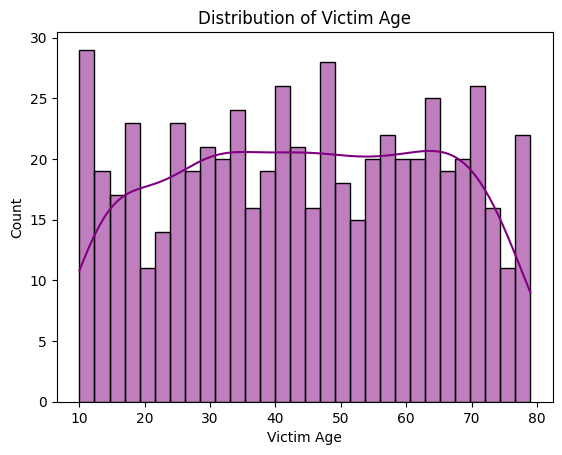

In [ ]:
# HistPlot showing Victim Age
numerical_col = 'Victim Age' 
print(df[numerical_col].describe())
sns.histplot(df[numerical_col], kde=True, bins=30, color='purple')
plt.title(f'Distribution of {numerical_col}')
plt.show()

#This Bar Chart is used to show which city has how much distribution of crimes. For Eg: Delhi has the Highest Distribution of any crime

count    600.000000
mean       9.545000
std        5.495298
min        1.000000
25%        5.000000
50%        9.000000
75%       14.000000
max       19.000000
Name: Police Deployed, dtype: float64


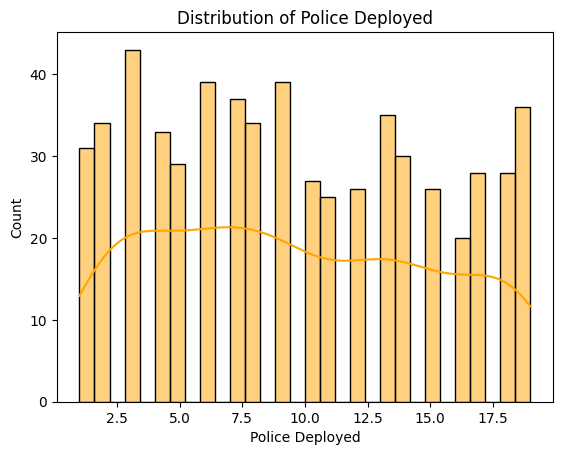

In [ ]:
# HistPlot showing Police Deployed
numerical_col = 'Police Deployed' 
print(df[numerical_col].describe())
sns.histplot(df[numerical_col], kde=True, bins=30, color='orange')
plt.title(f'Distribution of {numerical_col}')
plt.show()
#This shows the count of Police Deployed 

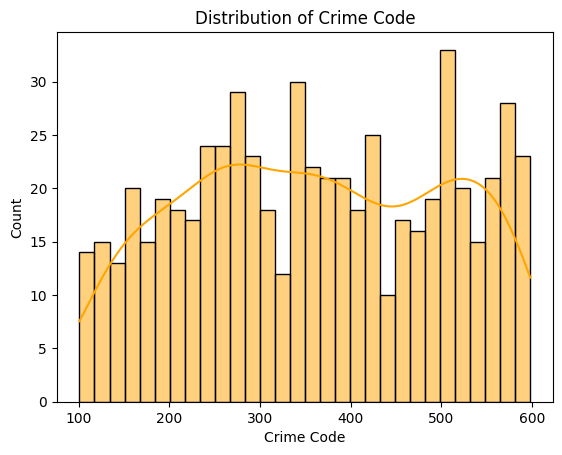

In [ ]:
# HistPlot showing Crime Code
numerical_col = 'Crime Code' 
sns.histplot(df[numerical_col], kde=True, bins=30, color='orange')
plt.title(f'Distribution of {numerical_col}')
plt.show()
#This shows the Count of Crime Codes and the highest number of Crime under the Code. In this we can see that crimes from 500 to 599 have been signifiacntly higher c
# comapred to the others 

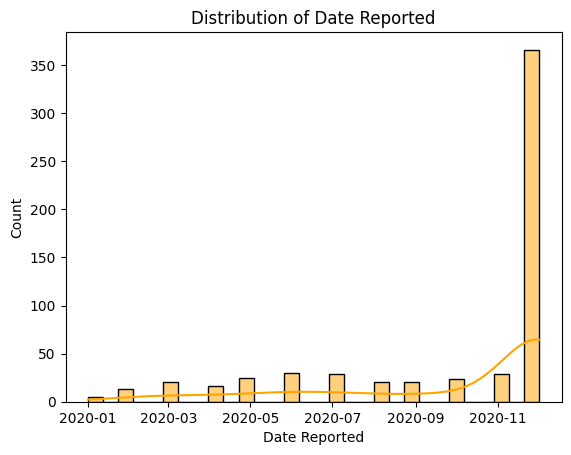

In [ ]:
# HistPlot showing Date Reported
numerical_col = 'Date Reported' 
sns.histplot(df[numerical_col], kde=True, bins=30, color='orange')
plt.title(f'Distribution of {numerical_col}')
plt.show()
#This shows the Count of crimes reported in 2020 and it can be seen that there is a sudden surge of reporting in October and November. 
#This is likely due to the fact that the data is from 2020 and the COVID-pandemic had made everyone  more vigilant and aware of the crimes happening

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date Reported       600 non-null    datetime64[ns]
 1   Date of Occurrence  600 non-null    datetime64[ns]
 2   Time of Occurrence  600 non-null    object        
 3   City                600 non-null    object        
 4   Crime Code          600 non-null    int64         
 5   Crime Description   600 non-null    object        
 6   Victim Age          600 non-null    int64         
 7   Victim Gender       600 non-null    object        
 8   Weapon Used         600 non-null    object        
 9   Crime Domain        600 non-null    object        
 10  Police Deployed     600 non-null    int64         
 11  Case Closed         600 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 56.4+ KB


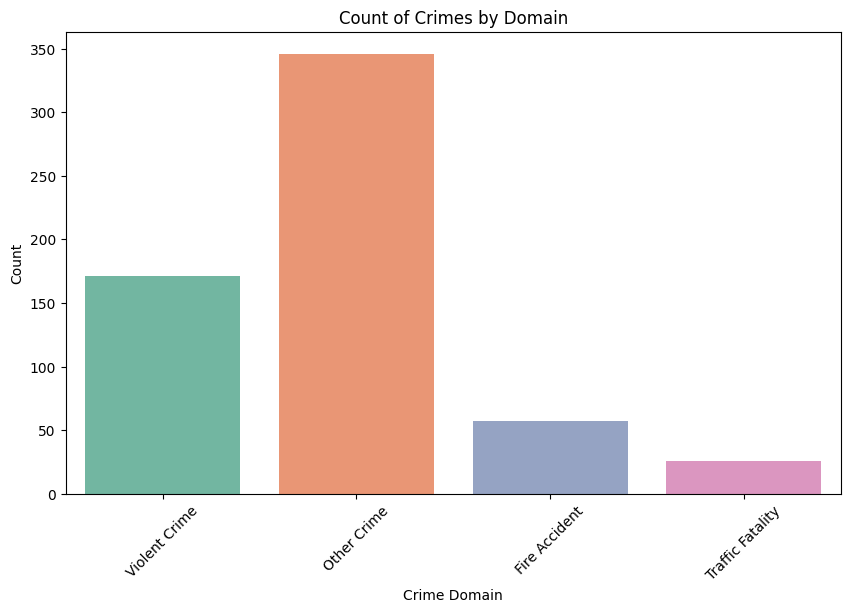

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(df, x='Crime Domain', hue='Crime Domain', dodge=False, legend=False, palette='Set2')
plt.title('Count of Crimes by Domain')
plt.xlabel('Crime Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# This displays the Count based on Crime Domain, the next after various crimes are 170 on average


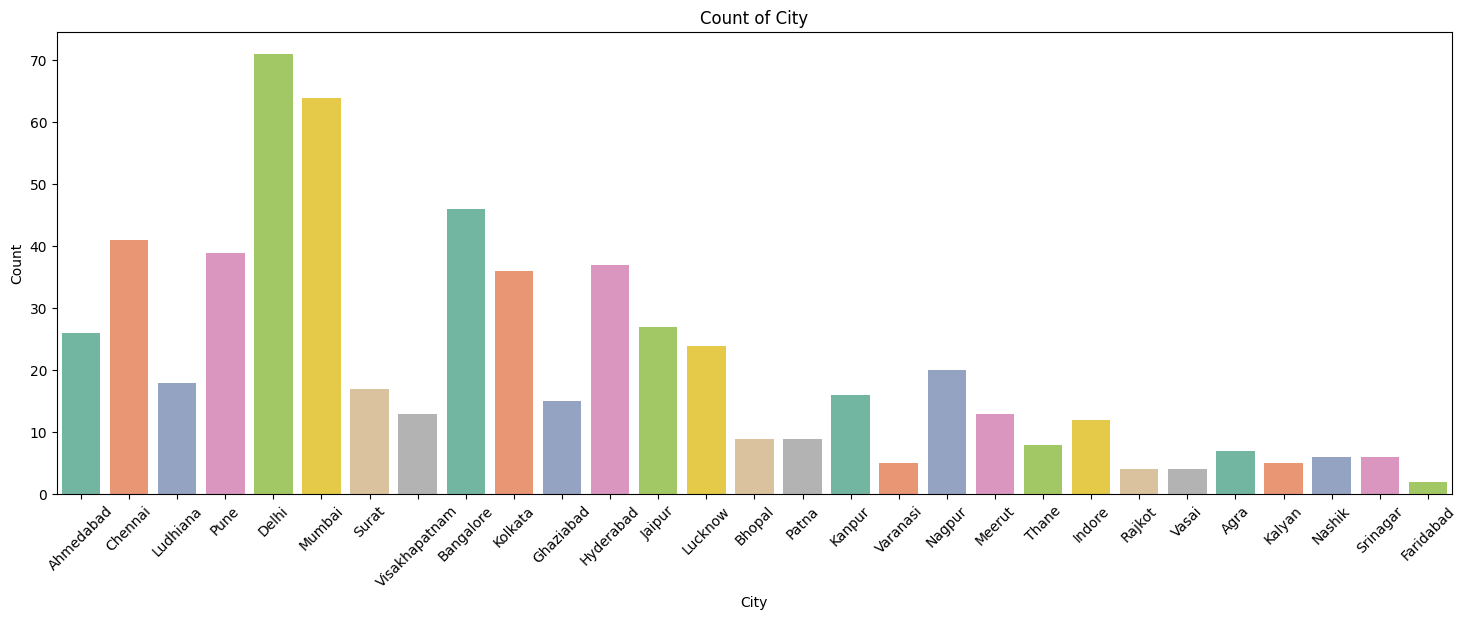

In [ ]:
# Example for one variable: 'City'
plt.figure(figsize=(18, 6))
sns.countplot(df, x='City', hue='City', dodge=False, legend=False, palette='Set2')
plt.title('Count of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This Shows which city in the country has the highest crime rate based on the dataset. As per this it is Delhi followed by Mumbai

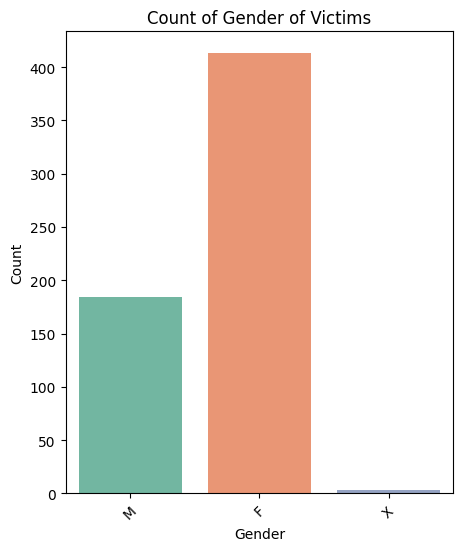

In [ ]:
# Example for one variable: 'City'
plt.figure(figsize=(5, 6))
sns.countplot(df, x='Victim Gender', hue='Victim Gender', dodge=False, legend=False, palette='Set2')
plt.title('Count of Gender of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This shows the Count of Victims by Gender. Maximum of the victims on whom the crimes are perpetrated despite the Domain and Description are Women

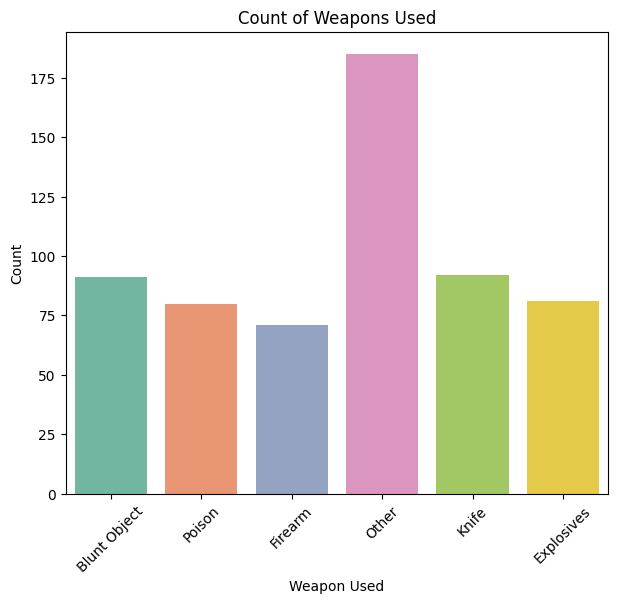

In [ ]:
# Example for one variable: 'City'
plt.figure(figsize=(7, 6))
sns.countplot(df, x='Weapon Used', hue='Weapon Used', dodge=False, legend=False, palette='Set2')
plt.title('Count of Weapons Used')
plt.xlabel('Weapon Used')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This gives an overall insight of the count of weapons being used for perpetrating crime in the country based on the dataset 

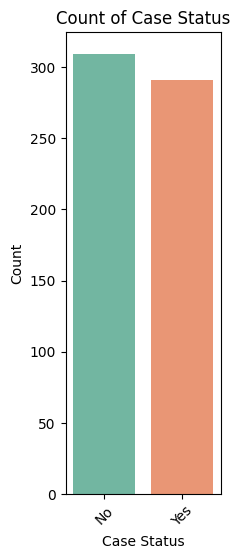

In [ ]:
# Example for one variable: 'City'
plt.figure(figsize=(2, 6))
sns.countplot(df, x='Case Closed', hue='Case Closed', dodge=False, legend=False, palette='Set2')
plt.title('Count of Case Status')
plt.xlabel('Case Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This shows the count of Case Statuses, Unfortunately maximum cases have not been solved yet due 
# to delay in the due process of law proceedings and finding of evidence also due to no witnesses agreeing to testify  

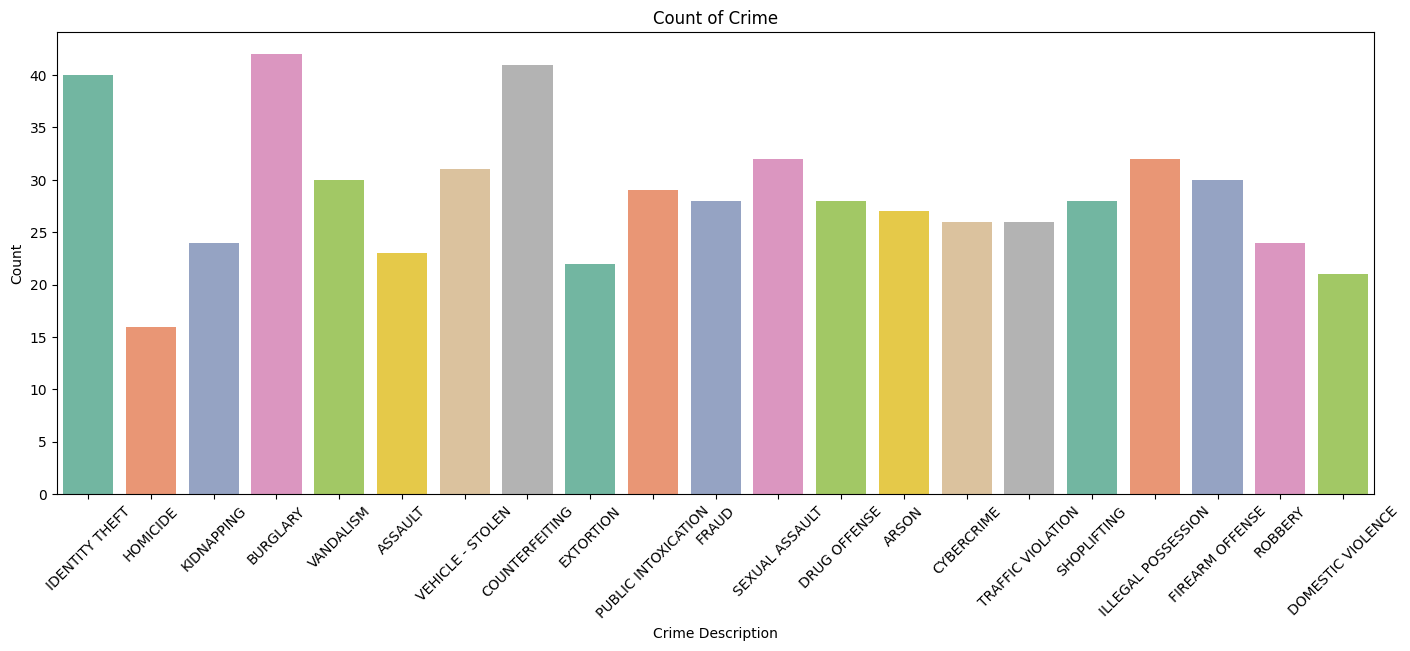

In [ ]:
# Example for one variable: 'City'
plt.figure(figsize=(17, 6))
sns.countplot(df, x='Crime Description', hue='Crime Description', dodge=False, legend=False, palette='Set2')
plt.title('Count of Crime')
plt.xlabel('Crime Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This displays the Count of each Crime Described from the entire dataset. This gives an overall insight as to the which is the Increasing Crime


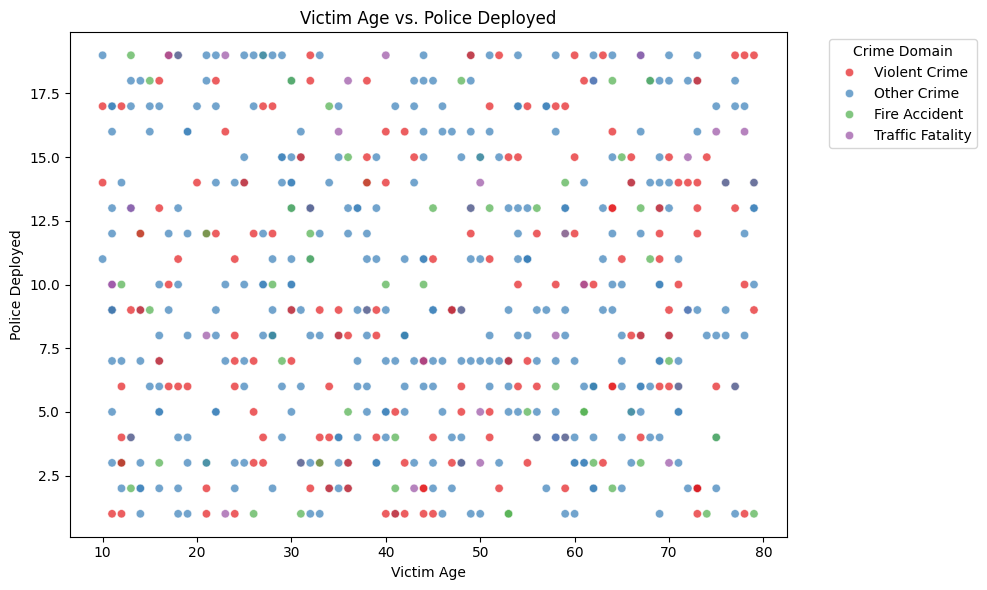

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Victim Age', y='Police Deployed', hue='Crime Domain', palette='Set1', alpha=0.7)
plt.title('Victim Age vs. Police Deployed')
plt.xlabel('Victim Age')
plt.ylabel('Police Deployed')
plt.legend(title='Crime Domain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#This Displays the Police Deployed for the Crime Domain and the Victim Age who are being affected due to these crimes taking place


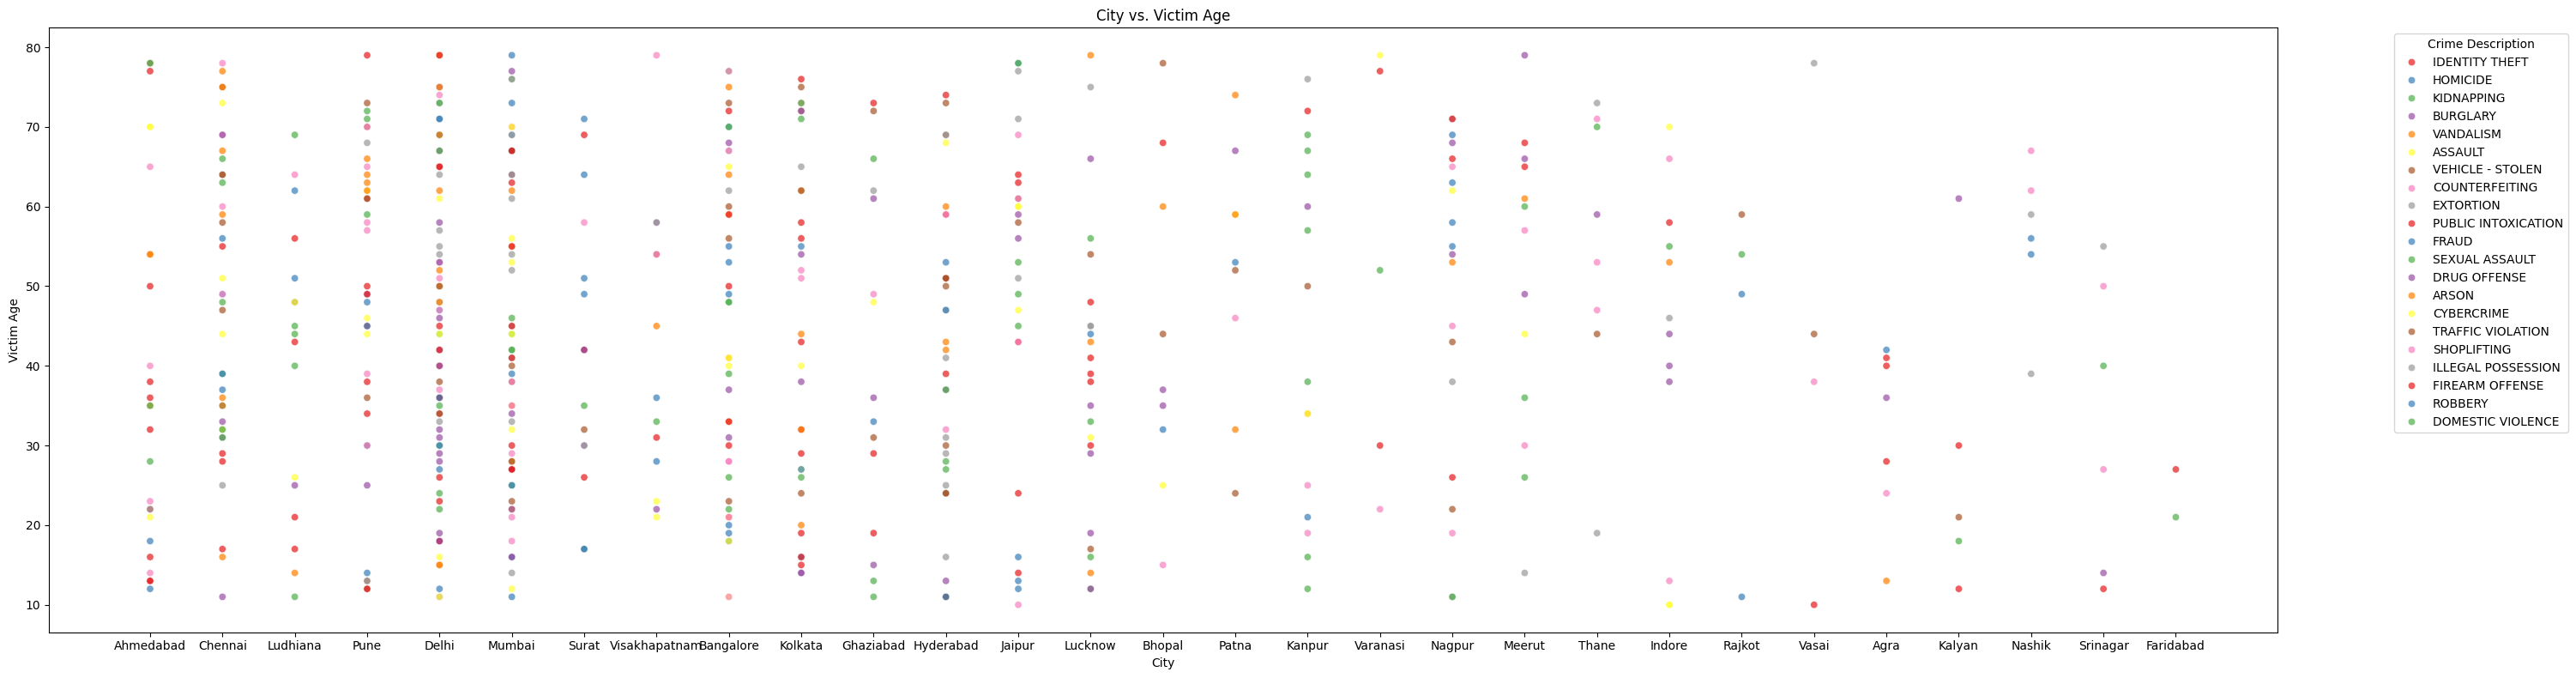

In [ ]:
plt.figure(figsize=(30, 8))
sns.scatterplot(data=df, x='City', y='Victim Age', hue='Crime Description', palette='Set1', alpha=0.7)
plt.title('City vs. Victim Age')
plt.xlabel('City')
plt.ylabel('Victim Age')
plt.legend(title='Crime Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#This  Displays the average Victim Age by the City and the Crime

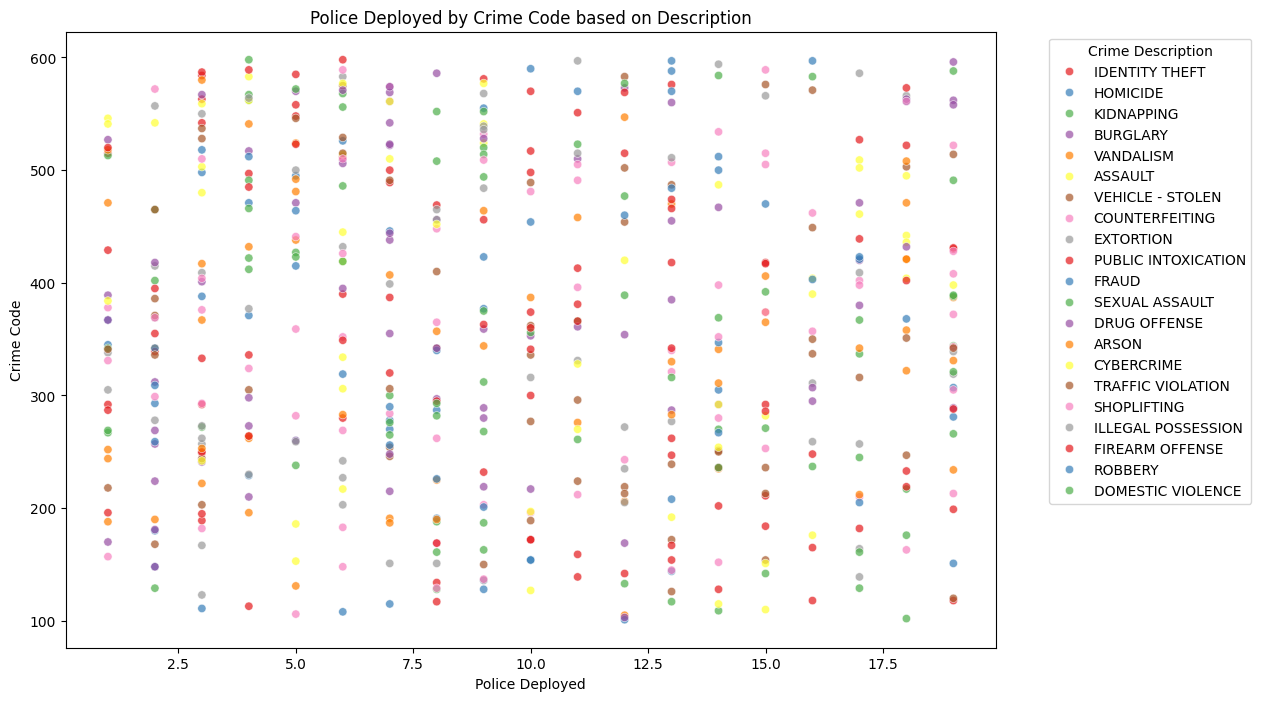

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(df,x="Police Deployed",y="Crime Code",hue='Crime Description',palette='Set1', alpha=0.7)
plt.title("Police Deployed by Crime Code based on Description")
plt.xlabel("Police Deployed")
plt.ylabel("Crime Code")
plt.legend(title="Crime Description",bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()
#This Scatter Plot helps to analyze the Average Deployment of Police by Crime Description and also the various crime Codes

Crime Domain  Fire Accident  Other Crime  Traffic Fatality  Violent Crime
Weapon Used                                                              
Blunt Object              8           50                 3             30
Explosives                4           57                 1             19
Firearm                  10           31                 2             28
Knife                     9           59                 7             17
Other                    14          106                 9             56
Poison                   12           43                 4             21


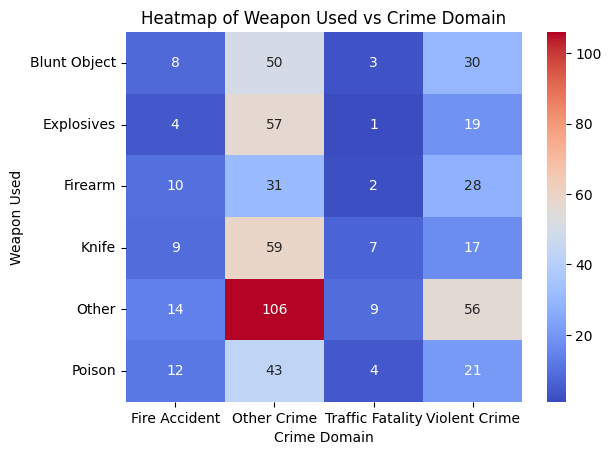

In [27]:
# Cross-tabulation and Heatmap
cat_col1, cat_col2 = 'Weapon Used', 'Crime Domain'  
crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
print(crosstab)
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
plt.show()

#Interpretation: The heatmap displays the relationship between Weapon Used and Crime Domain by visualizing the frequency in a cross-tabulation table. 
#The represents the count of occurrences, helping to identify trends or patterns in weapon usage across different crime domains.

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12608\1925825035.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='Weapon Used', columns='Age Group', aggfunc='size', fill_value=0)


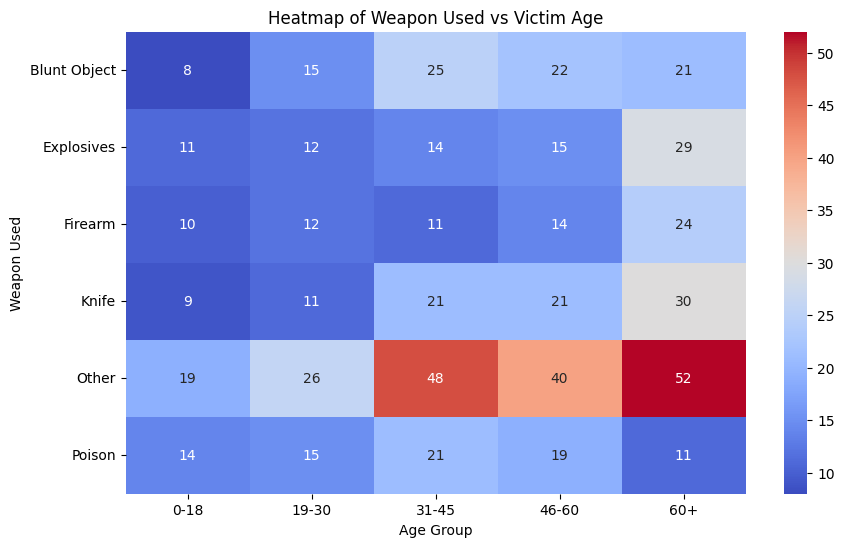

In [28]:
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Victim Age'], bins=age_bins, labels=age_labels, right=False)

pivot_table = df.pivot_table(index='Weapon Used', columns='Age Group', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Weapon Used vs Victim Age')
plt.ylabel('Weapon Used')
plt.xlabel('Age Group')
plt.show()

#Interpretation: This shows Weapons Used and Victims Age, which weapon was used for which victim age group and how it affected them

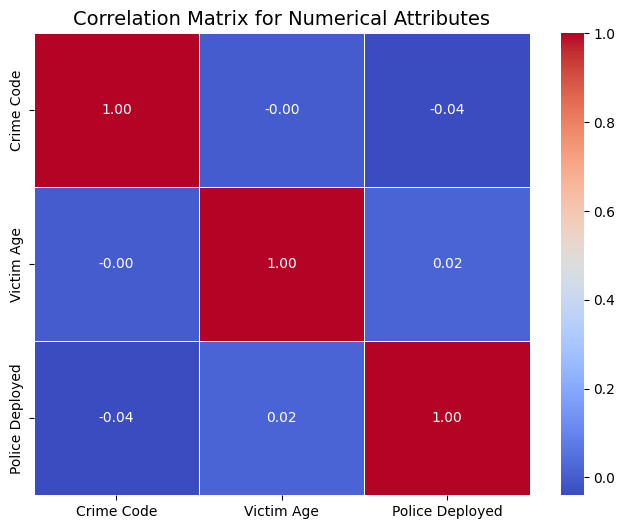

In [ ]:
# Correlation Matrix of Crime Code, Victim Age and Police Deployment
numerical_cols = ['Crime Code', 'Victim Age', 'Police Deployed']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Attributes", fontsize=14)
plt.show()
#It shows the Correlation Matrix based on Crime Code, Victim Age and Police Deployed

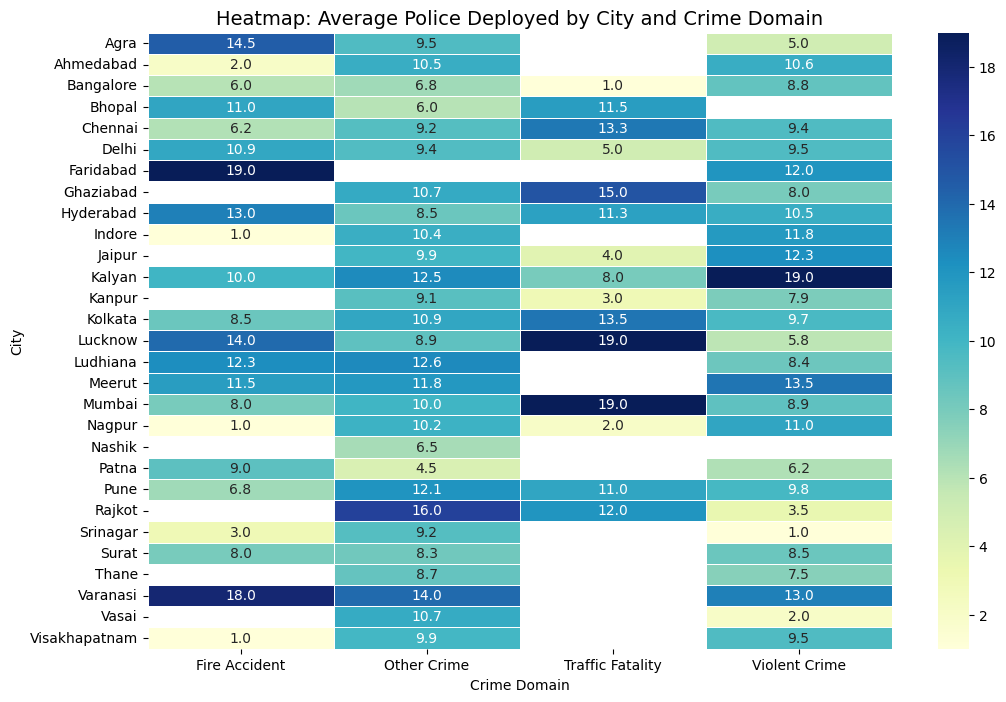

In [ ]:
# Average Police Deployment by City and Crime
heatmap_data = df.pivot_table(index='City',columns='Crime Domain',values='Police Deployed',aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Police Deployed by City and Crime Domain", fontsize=14)
plt.show()
#Highlights how Police are Deployed across various City depending on the Crime Domain.

Crime Domain  Fire Accident  Other Crime  Traffic Fatality  Violent Crime
Weapon Used                                                              
Blunt Object              8           50                 3             30
Explosives                4           57                 1             19
Firearm                  10           31                 2             28
Knife                     9           59                 7             17
Other                    14          106                 9             56
Poison                   12           43                 4             21


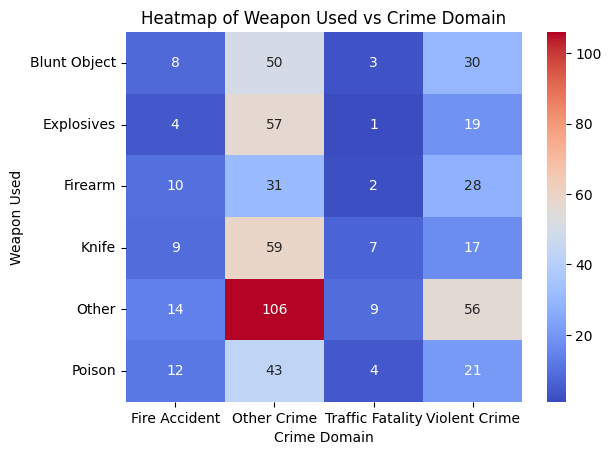

In [ ]:
# Cross-tabulation and Heatmap
cat_col1, cat_col2 = 'Weapon Used', 'Crime Domain'  
crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
print(crosstab)
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
plt.show()

#Interpretation: The heatmap displays the relationship between Weapon Used and Crime Domain by visualizing the frequency in a cross-tabulation table. 
#This represents the count of occurrences, helping to identify trends or patterns in weapon usage across different crime domains.

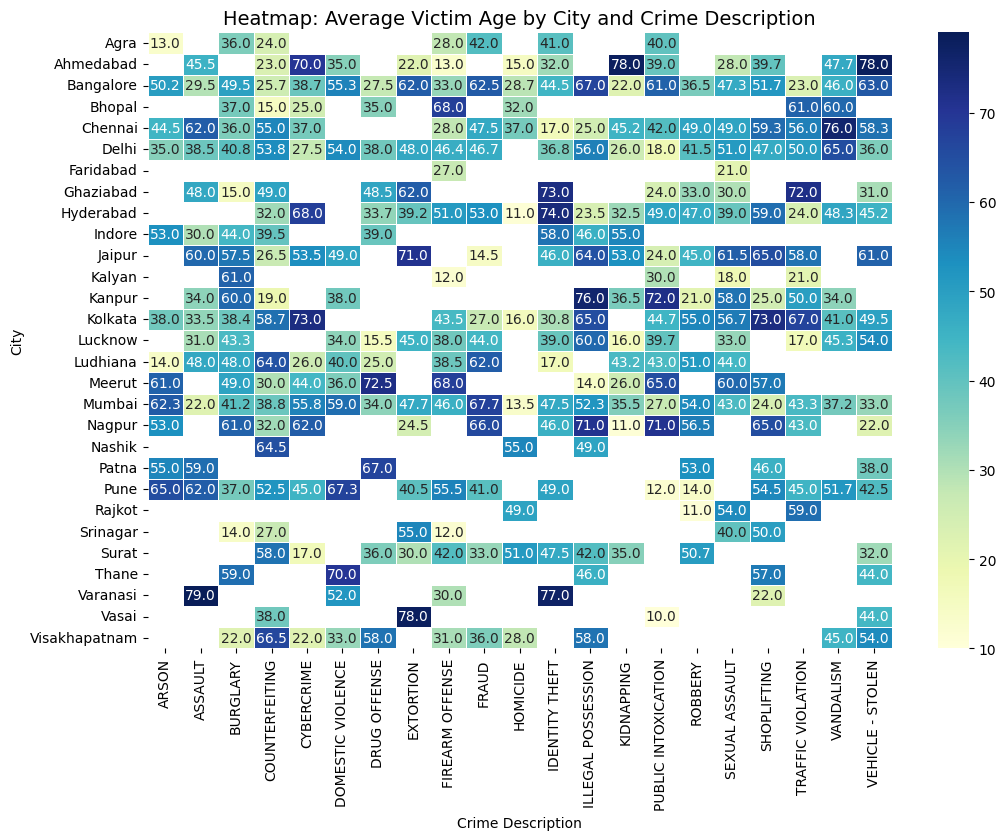

In [ ]:
heatmap_data = df.pivot_table(
    index='City',
    columns='Crime Description',
    values='Victim Age',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Victim Age by City and Crime Description", fontsize=14)
plt.show()

#This Heat Map Displays the average Victim Age by the City and the Crime. For eg. In NAgpur the Avg Victim Age for Robbery is 56 Years

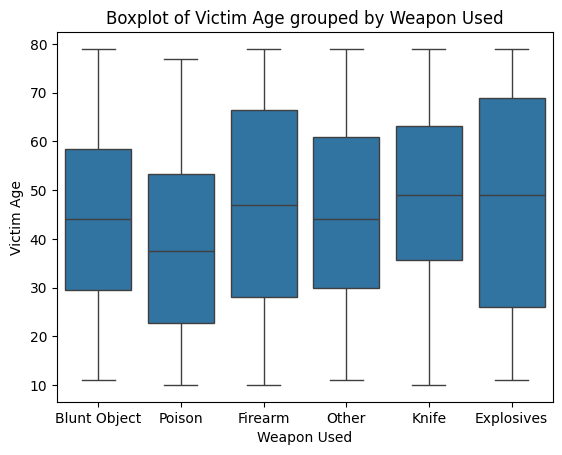

In [33]:
# Numerical vs Categorical: Boxplot
sns.boxplot(x=df['Weapon Used'], y=df['Victim Age'])
plt.title(f'Boxplot of {'Victim Age'} grouped by {'Weapon Used'}')
plt.show()

#Interpretation:
#We can interpret that which age group people are killed or injured with which weapon.
#For eg.Firearm is used to injure or kill people between the age group of 25 to 65

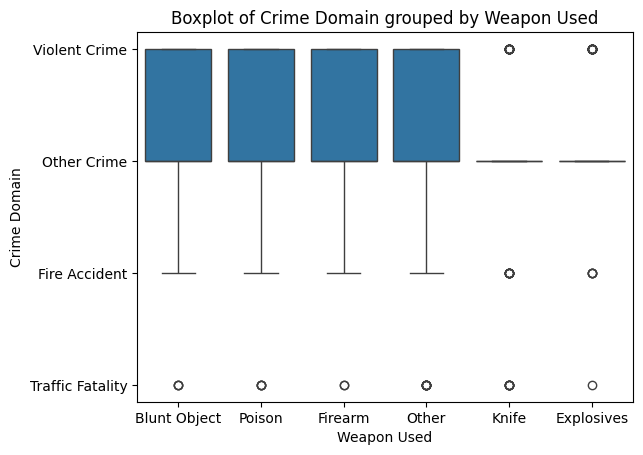

In [ ]:

sns.boxplot(x=df['Weapon Used'], y=df['Crime Domain'])
plt.title(f'Boxplot of {'Crime Domain'} grouped by {'Weapon Used'}')
plt.show()

#This Showcases the Crime Domain and the Weapon Used and the Mean, Q1 and Q3 of the weapon being used

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date Reported       600 non-null    datetime64[ns]
 1   Date of Occurrence  600 non-null    datetime64[ns]
 2   Time of Occurrence  600 non-null    object        
 3   City                600 non-null    object        
 4   Crime Code          600 non-null    int64         
 5   Crime Description   600 non-null    object        
 6   Victim Age          600 non-null    int64         
 7   Victim Gender       600 non-null    object        
 8   Weapon Used         600 non-null    object        
 9   Crime Domain        600 non-null    object        
 10  Police Deployed     600 non-null    int64         
 11  Case Closed         600 non-null    object        
 12  Age Group           600 non-null    category      
dtypes: category(1), datetime64[ns](2), int64(3), objec

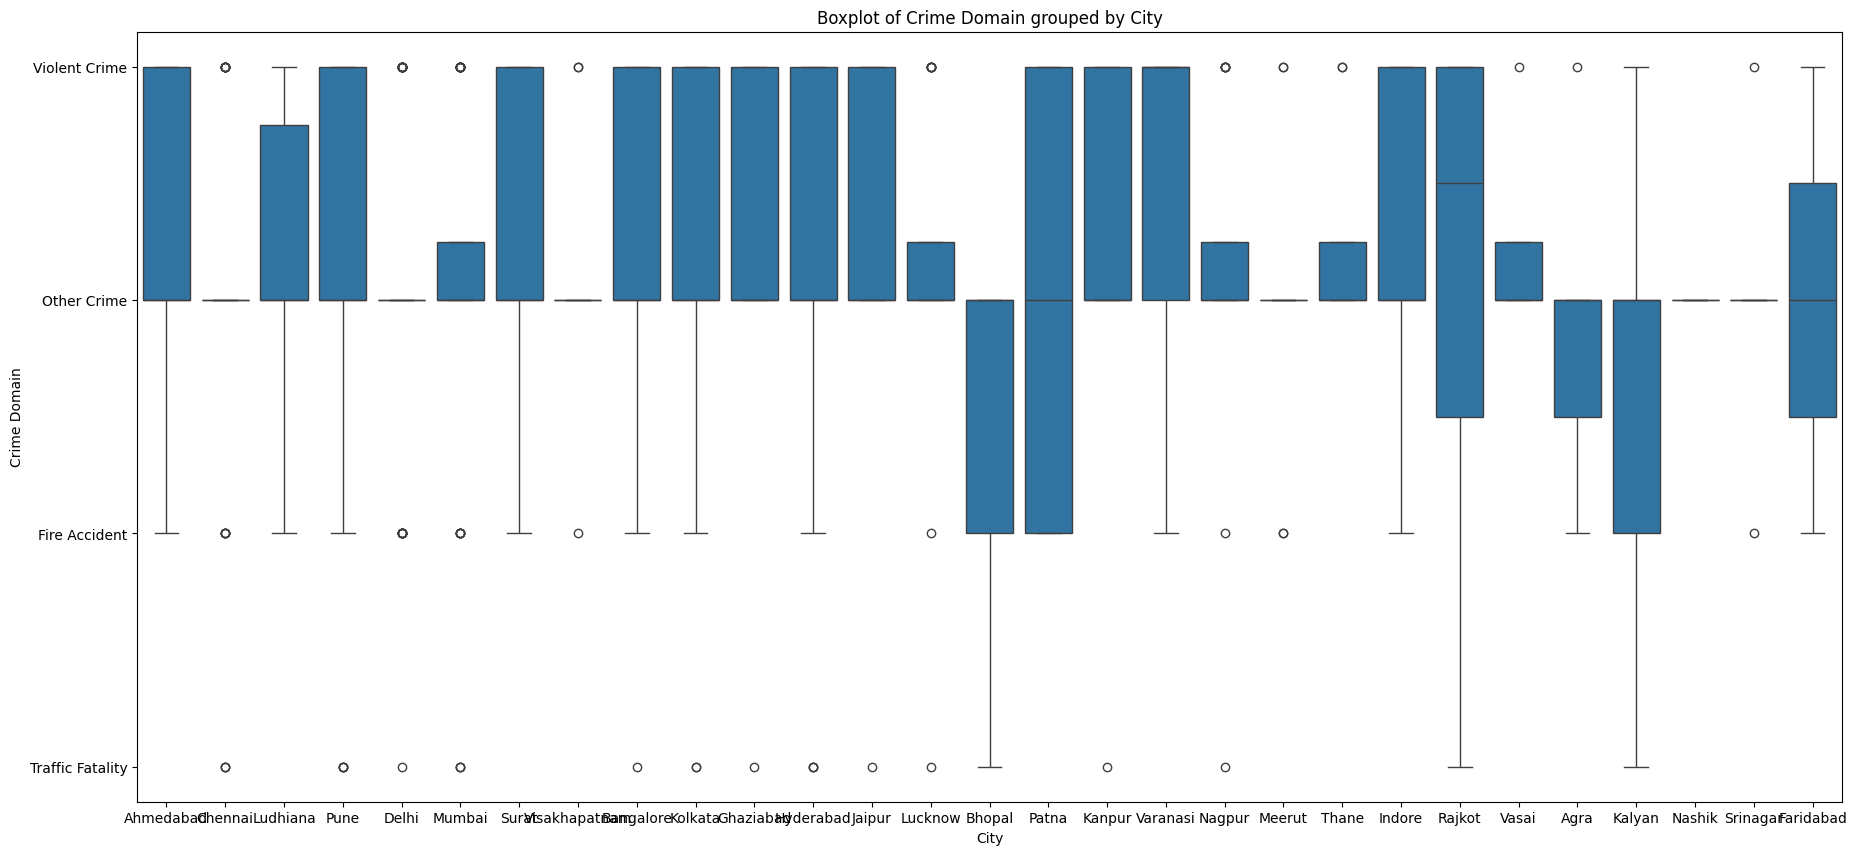

In [ ]:
plt.figure(figsize=(22,10))
sns.boxplot(x=df['City'], y=df['Crime Domain'])
plt.title(f'Boxplot of {'Crime Domain'} grouped by {'City'}')
plt.show()
#This Displays the BoxPlot of Crime for the City which are being taking places.

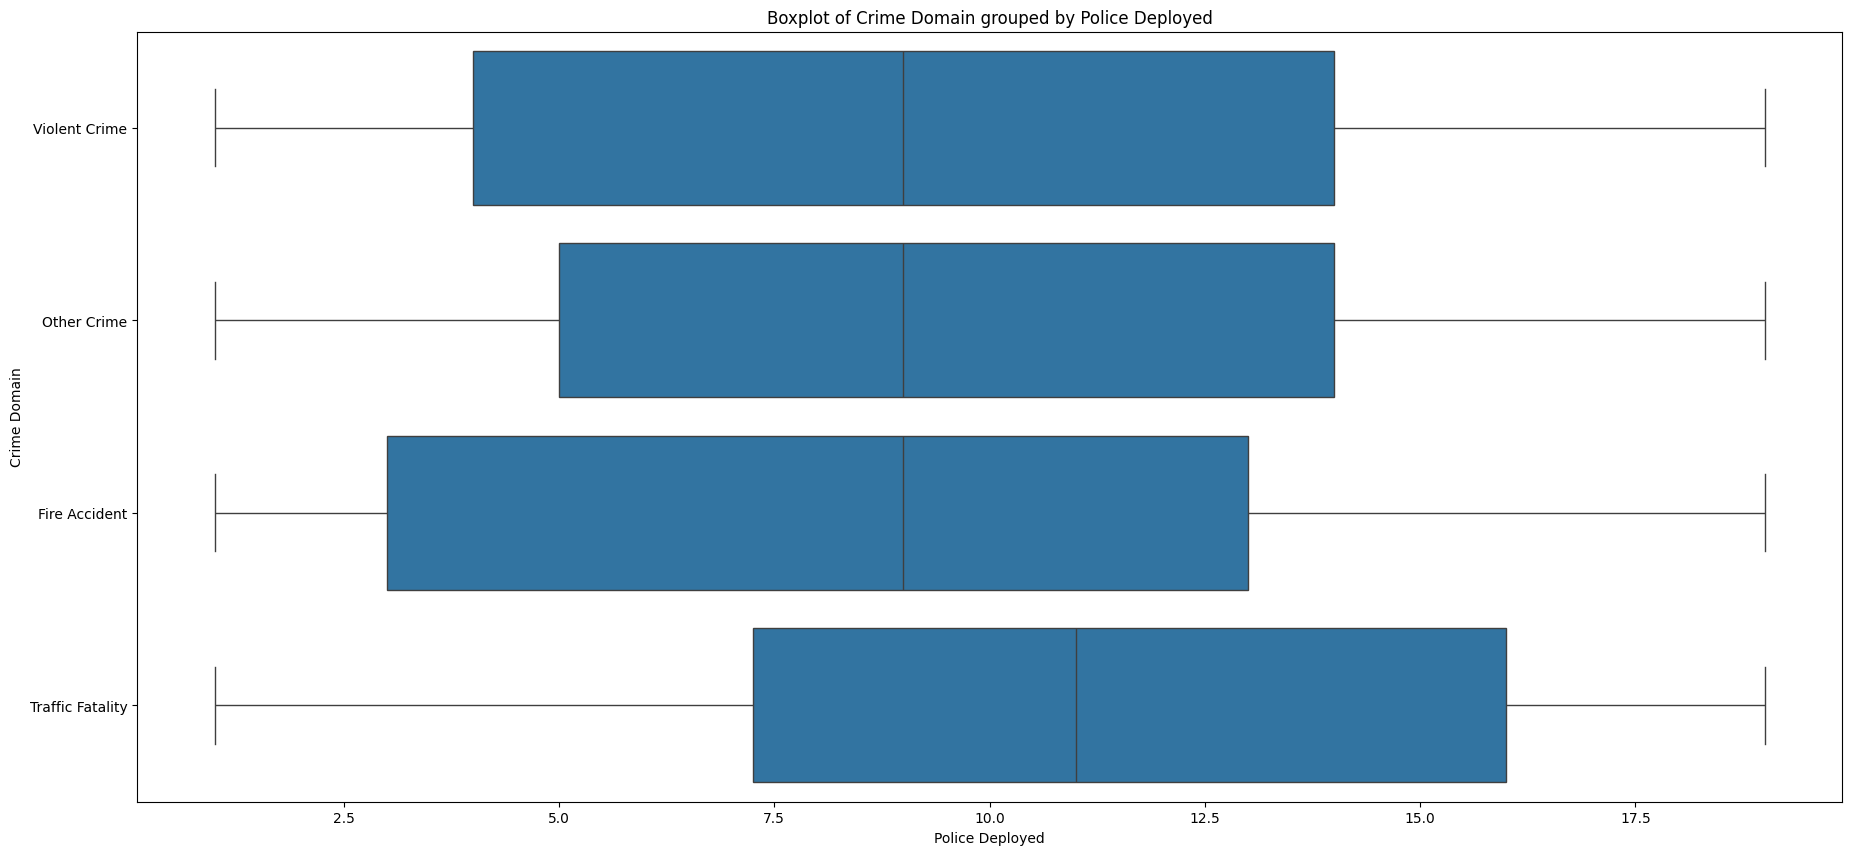

In [ ]:
plt.figure(figsize=(22,10))
sns.boxplot(x=df['Police Deployed'], y=df['Crime Domain'])
plt.title(f'Boxplot of {'Crime Domain'} grouped by {'Police Deployed'}')
plt.show()

#This Displays the BoxPlot of Police Deployed for the Crime Domain which are being taking places. The mean for all Crime Domains is 8

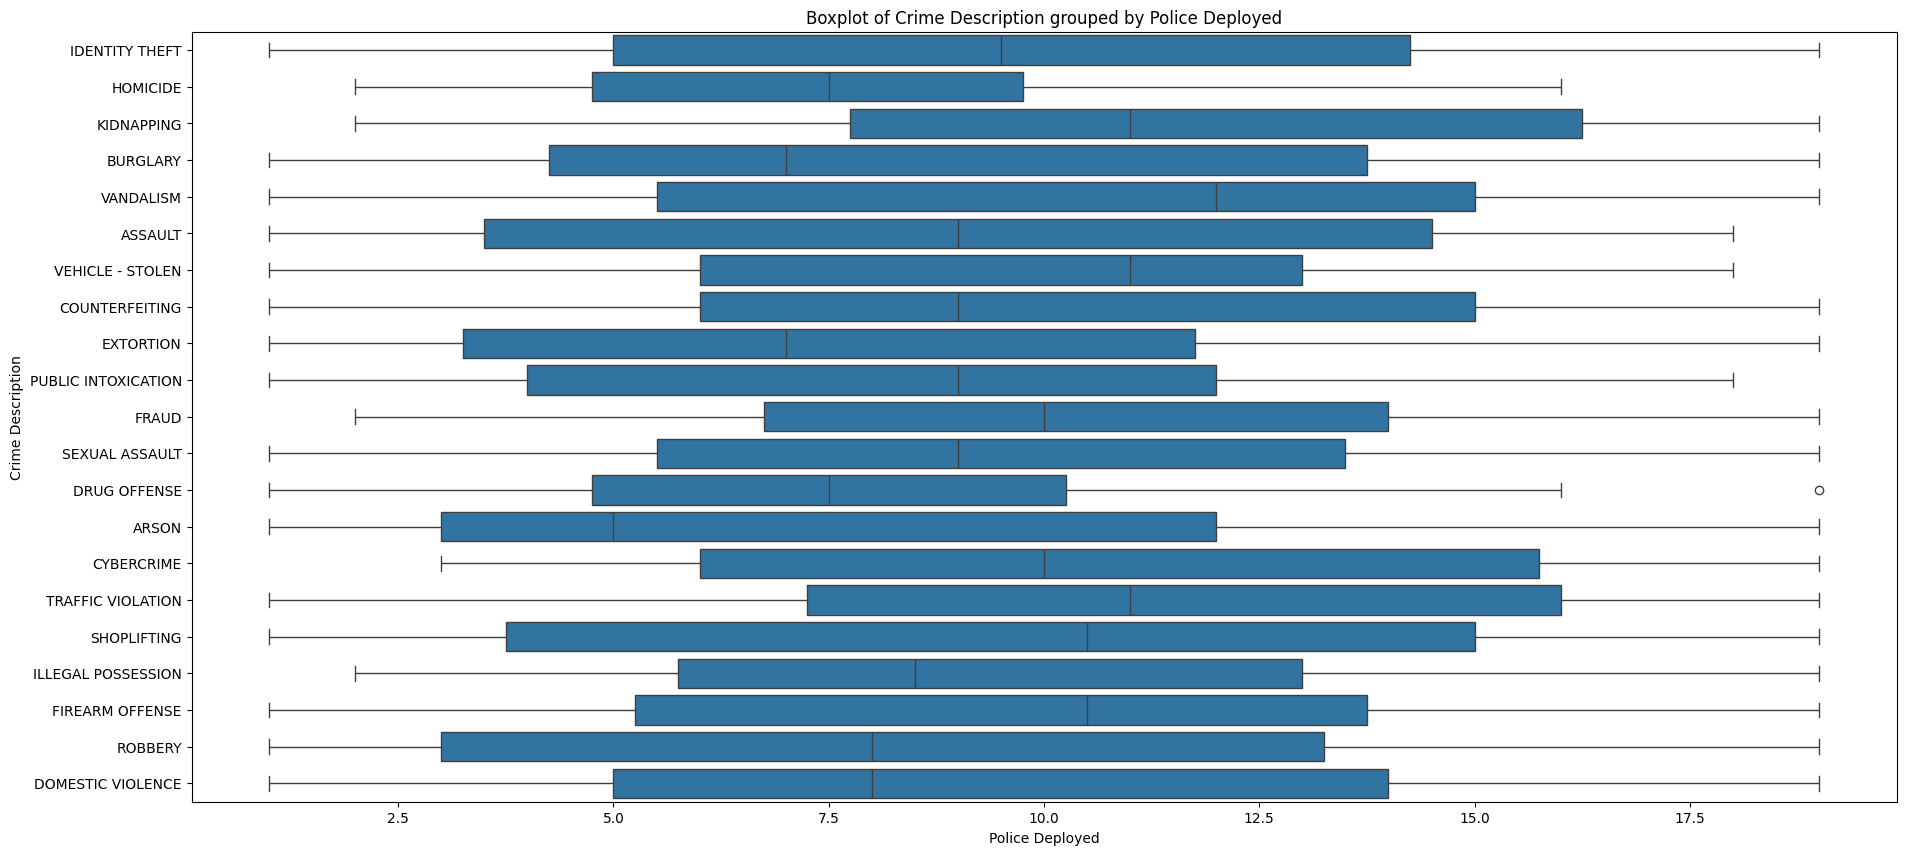

In [ ]:
plt.figure(figsize=(22,10))
sns.boxplot(x=df['Police Deployed'], y=df['Crime Description'])
plt.title(f'Boxplot of {'Crime Description'} grouped by {'Police Deployed'}')
plt.show()

#This Displays the BoxPlot of Police Deployed for the Crimes which are being taking places. The middle line shows the mean police deployment for the Crime Described

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12608\4065874624.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Ludhiana'),
  Text(3, 0, 'Pune'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Mumbai'),
  Text(6, 0, 'Surat'),
  Text(7, 0, 'Visakhapatnam'),
  Text(8, 0, 'Bangalore'),
  Text(9, 0, 'Kolkata'),
  Text(10, 0, 'Ghaziabad'),
  Text(11, 0, 'Hyderabad'),
  Text(12, 0, 'Jaipur'),
  Text(13, 0, 'Lucknow'),
  Text(14, 0, 'Bhopal'),
  Text(15, 0, 'Patna'),
  Text(16, 0, 'Kanpur'),
  Text(17, 0, 'Varanasi'),
  Text(18, 0, 'Nagpur'),
  Text(19, 0, 'Meerut'),
  Text(20, 0, 'Thane'),
  Text(21, 0, 'Indore'),
  Text(22, 0, 'Rajkot'),
  Text(23, 0, 'Vasai'),
  Text(24, 0, 'Agra'),
  Text(25, 0, 'Kalyan'),
  Text(26, 0, 'Nashik'),
  Text(27, 0, 'Srinagar'),
  Text(28, 0, 'Faridabad')])

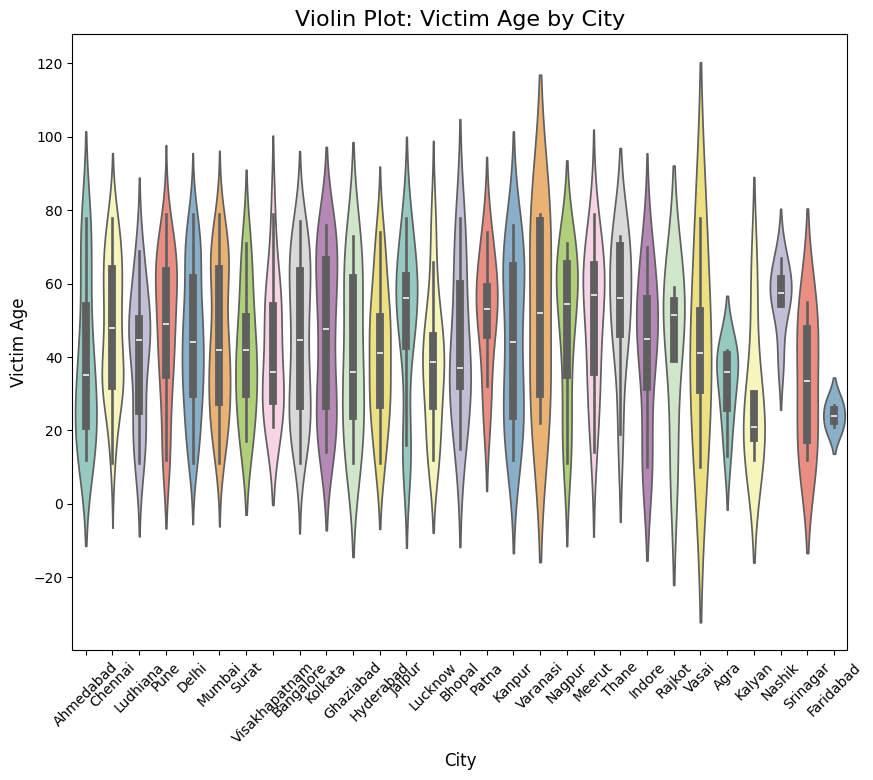

In [ ]:
category = 'City'  
numeric_column = 'Victim Age'  


filtered_data = df[[category, numeric_column]].dropna()


plt.figure(figsize=(22, 8))


plt.subplot(1, 2, 1)
sns.violinplot(x=category,y=numeric_column,data=filtered_data,palette="Set3")
plt.title('Violin Plot: Victim Age by City', fontsize=16)
plt.xlabel(category, fontsize=12)
plt.ylabel(numeric_column, fontsize=12)
plt.xticks(rotation=45)

#This Displays the Violin Plot of Victims Age and by City what average age group are being afffected . It helips to map which city has more Victims ultimately telling about the crime rate in the city

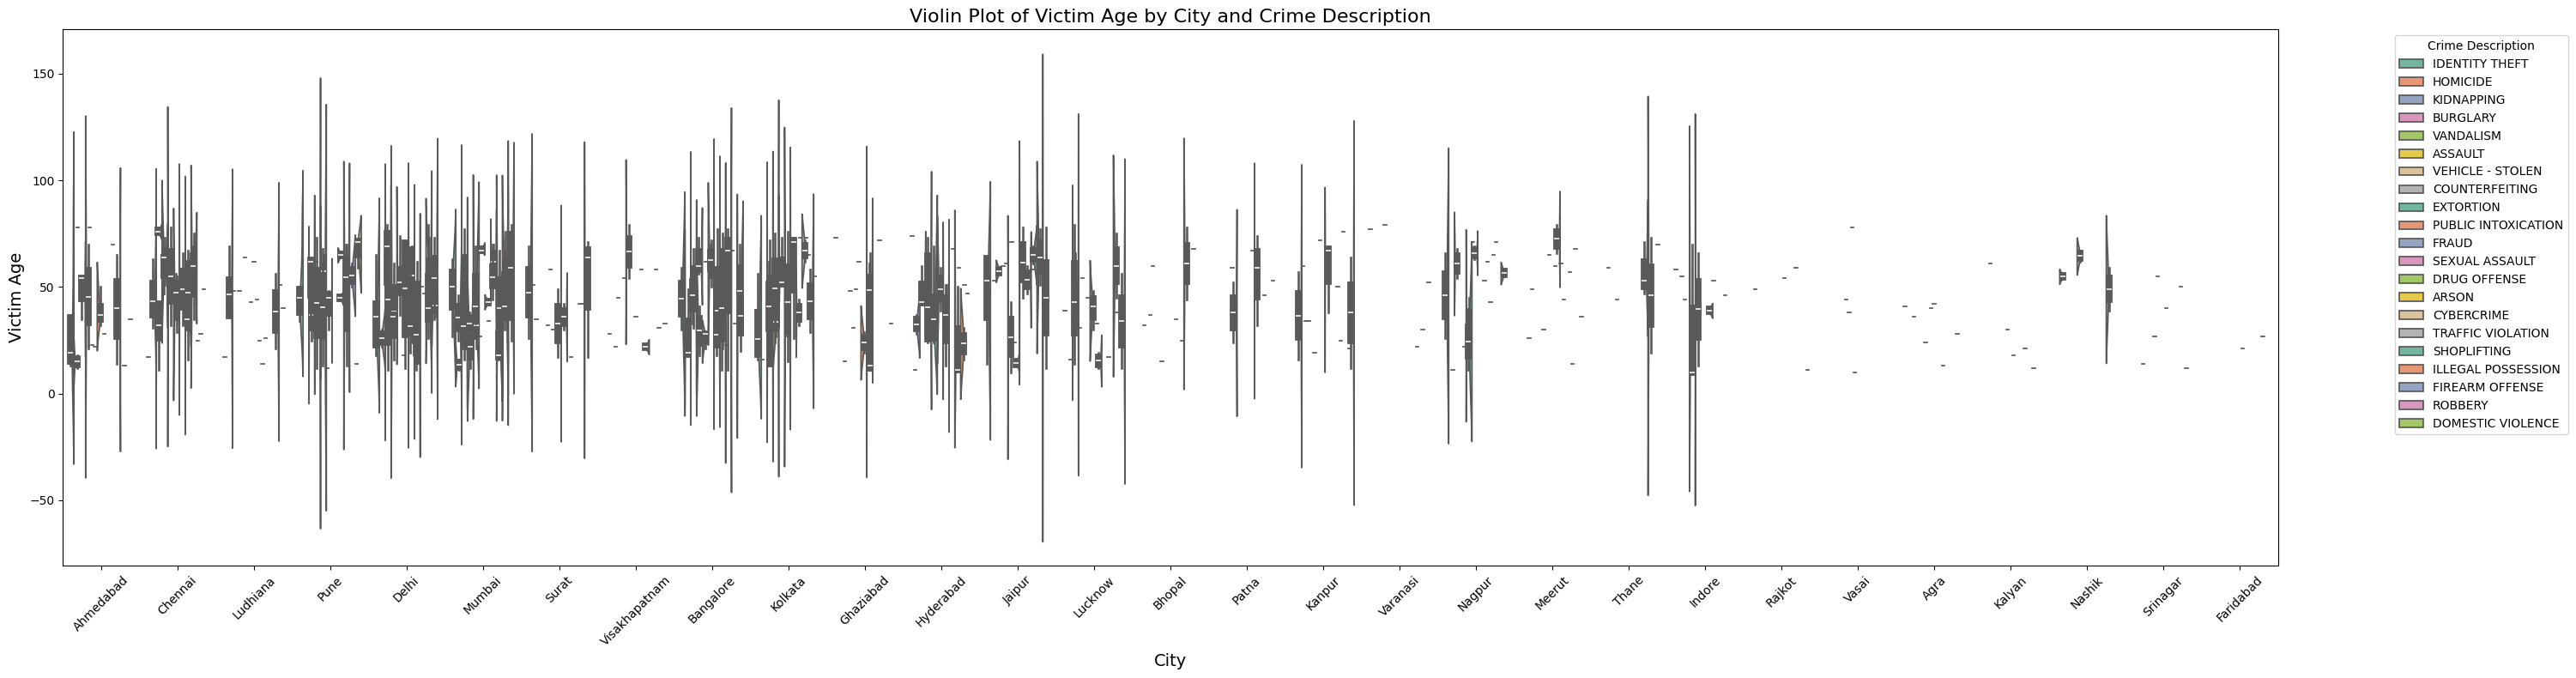

In [ ]:

category_1 = 'City'  
category_2 = 'Crime Description'  
numeric_column = 'Victim Age'  

plt.figure(figsize=(30, 8))
sns.violinplot(df,
    x=category_1,
    y=numeric_column,
    hue=category_2,
    split=True,
    palette="Set2"
)
plt.title('Violin Plot of Victim Age by City and Crime Description', fontsize=16)
plt.xlabel(category_1, fontsize=14)
plt.ylabel(numeric_column, fontsize=14)
plt.legend(title=category_2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#This displays the Violin Plot of VIctims Age by Crime Description and City. For Eg Faridabad has less curve of the Violin Plot by Crime Description and Victim age 


C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12608\3615786935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


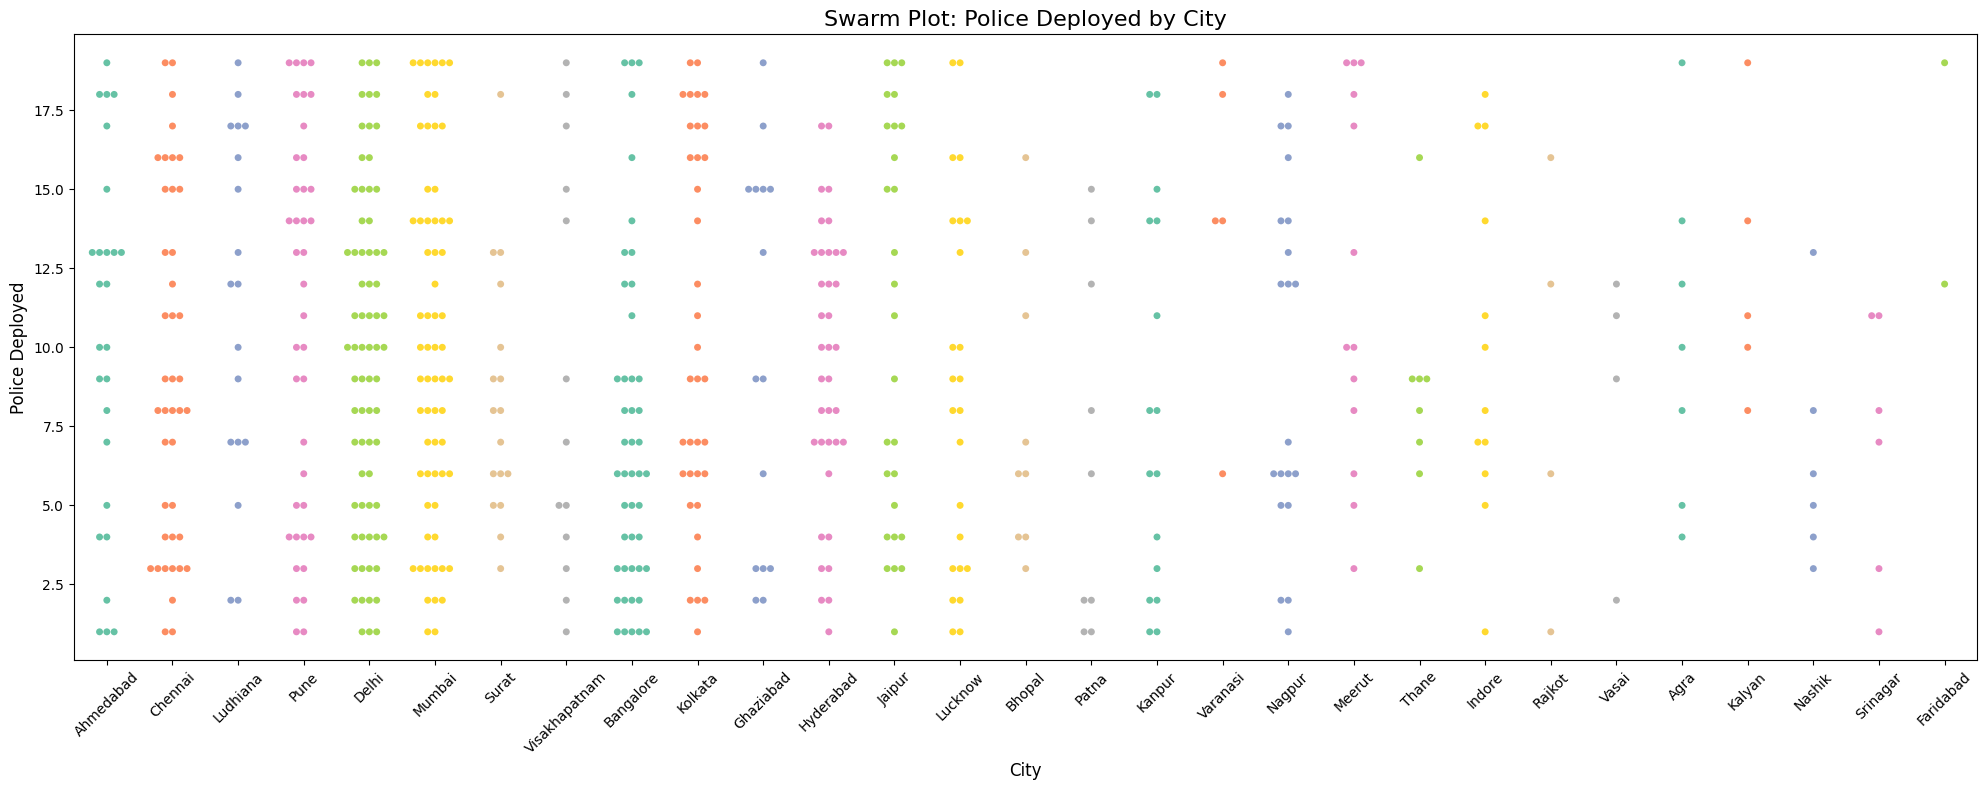

In [ ]:
category = 'City'  
hue_column = 'Police Deployed'  

# Create the Swarm Plot
plt.figure(figsize=(20, 8))
sns.swarmplot(df,x=category,y=hue_column, palette="Set2")
plt.title('Swarm Plot: Police Deployed by City', fontsize=16)
plt.xlabel(category, fontsize=12)
plt.ylabel(hue_column, fontsize=12)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

# This Displays the Swarm Plot of Police which are deployed by each city, it gives an entire overview as to the distribution.
# For eg, Faridabad has less deployment due to low crime rate

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date Reported       600 non-null    datetime64[ns]
 1   Date of Occurrence  600 non-null    datetime64[ns]
 2   Time of Occurrence  600 non-null    object        
 3   City                600 non-null    object        
 4   Crime Code          600 non-null    int64         
 5   Crime Description   600 non-null    object        
 6   Victim Age          600 non-null    int64         
 7   Victim Gender       600 non-null    object        
 8   Weapon Used         600 non-null    object        
 9   Crime Domain        600 non-null    object        
 10  Police Deployed     600 non-null    int64         
 11  Case Closed         600 non-null    object        
 12  Age Group           600 non-null    category      
dtypes: category(1), datetime64[ns](2), int64(3), objec

In [ ]:
categorical_data = df.select_dtypes(include=['object', 'category'])
print("Categorical Columns in the Dataset:")
print(categorical_data.columns)

#It showcases the Categorical Data in the Dataset on which the Categorical EDA is to be performed

Categorical Columns in the Dataset:
Index(['Time of Occurrence', 'City', 'Crime Description', 'Victim Gender',
       'Weapon Used', 'Crime Domain', 'Case Closed', 'Age Group'],
      dtype='object')



EDA for Nominal Data - City
City
Delhi            71
Mumbai           64
Bangalore        46
Chennai          41
Pune             39
Hyderabad        37
Kolkata          36
Jaipur           27
Ahmedabad        26
Lucknow          24
Nagpur           20
Ludhiana         18
Surat            17
Kanpur           16
Ghaziabad        15
Visakhapatnam    13
Meerut           13
Indore           12
Bhopal            9
Patna             9
Thane             8
Agra              7
Nashik            6
Srinagar          6
Varanasi          5
Kalyan            5
Rajkot            4
Vasai             4
Faridabad         2
Name: count, dtype: int64


C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12608\3745249200.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=nominal_column, data=df, palette='Set2', order=df[nominal_column].value_counts().index)


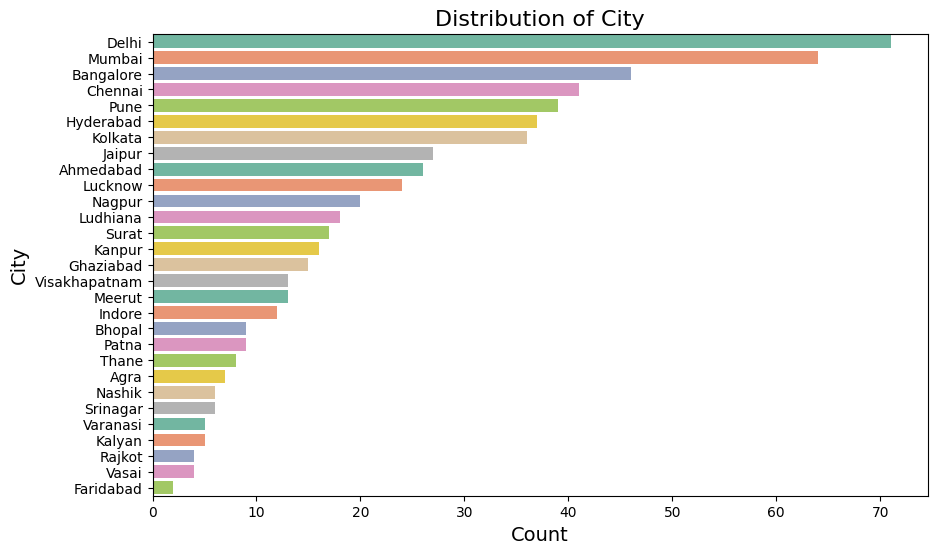


EDA for Ordinal Data - Age Group
Age Group
60+      167
31-45    140
46-60    131
19-30     91
0-18      71
Name: count, dtype: int64


C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_12608\3745249200.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=ordinal_column, data=df, palette='Set3', order=df[ordinal_column].value_counts().index)


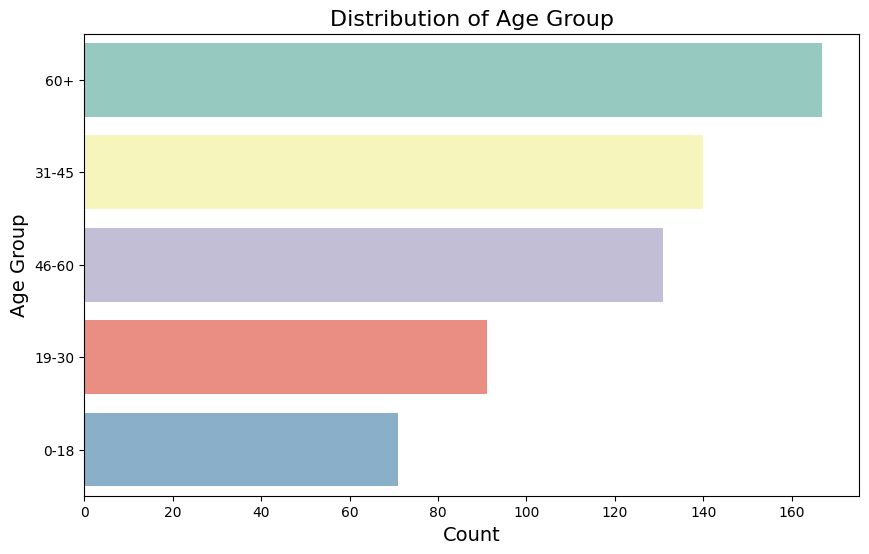


Binary Encoding for City:
   City_0  City_1  City_2  City_3  City_4
0       0       0       0       0       1
1       0       0       0       1       0
2       0       0       0       1       1
3       0       0       1       0       0
4       0       0       1       0       0


In [ ]:
import category_encoders as ce


# Categorical Data Columns
nominal_column = 'City'  
ordinal_column = 'Age Group'  

# EDA for Nominal Data
print(f"\nEDA for Nominal Data - {nominal_column}")
print(df[nominal_column].value_counts())

# Bar plot for Nominal Data
plt.figure(figsize=(10, 6))
sns.countplot(df,y=nominal_column, palette='Set2', order=df[nominal_column].value_counts().index)
plt.title(f"Distribution of {nominal_column}", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel(nominal_column, fontsize=14)
plt.show()

#EDA for Ordinal Data 
print(f"\nEDA for Ordinal Data - {ordinal_column}")
print(df[ordinal_column].value_counts())

# Bar plot for Ordinal Data
plt.figure(figsize=(10, 6))
sns.countplot(df,y=ordinal_column, palette='Set3', order=df[ordinal_column].value_counts().index)
plt.title(f"Distribution of {ordinal_column}", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel(ordinal_column, fontsize=14)
plt.show()


# Binary Encoding for Nominal Data
binary_encoder = ce.BinaryEncoder(cols=[nominal_column])
binary_encoded_data = binary_encoder.fit_transform(df[nominal_column])
print(f"\nBinary Encoding for {nominal_column}:")
print(binary_encoded_data.head())

In [70]:
df.head()

,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Age Group
0,2020-02-01 00:00:00,2020-01-01 00:00:00,01/01/2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,0-18
1,2020-01-01 19:00:00,2020-01-01 01:00:00,01/01/2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,31-45
2,2020-02-01 05:00:00,2020-01-01 02:00:00,01/01/2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,46-60
3,2020-01-01 05:00:00,2020-01-01 03:00:00,01/01/2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,46-60
4,2020-01-01 21:00:00,2020-01-01 04:00:00,01/01/2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,31-45


In [ ]:
#Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder


age_group_order = ['0-18', '19-30', '31-45', '46-60', '60+']

# Apply OrdinalEncoder with the custom order
ordinal_encoder = OrdinalEncoder(categories=[age_group_order])
df['Age Group Encoded'] = ordinal_encoder.fit_transform(df[['Age Group']])

# Show the result
print(df[['Age Group', 'Age Group Encoded']].head())

#This Output of Label Encoding on Age Group Showcases the Age Group along with the unique identifier which has been assigned to it


  Age Group  Age Group Encoded
0      0-18                0.0
1     31-45                2.0
2     46-60                3.0
3     46-60                3.0
4     31-45                2.0


In [ ]:
# One Hot Encoding

import pandas as pd

df_one_hot = pd.get_dummies(df, columns=['City'])

# Display the result
print(df_one_hot.head())

#Converts Each unique City Column into a seperate binary bins  


        Date Reported  Date of Occurrence Time of Occurrence  Crime Code  \
0 2020-02-01 00:00:00 2020-01-01 00:00:00   01/01/2020 01:11         576   
1 2020-01-01 19:00:00 2020-01-01 01:00:00   01/01/2020 06:26         128   
2 2020-02-01 05:00:00 2020-01-01 02:00:00   01/01/2020 14:30         271   
3 2020-01-01 05:00:00 2020-01-01 03:00:00   01/01/2020 14:46         170   
4 2020-01-01 21:00:00 2020-01-01 04:00:00   01/01/2020 16:51         421   

  Crime Description  Victim Age Victim Gender   Weapon Used   Crime Domain  \
0    IDENTITY THEFT          16             M  Blunt Object  Violent Crime   
1          HOMICIDE          37             M        Poison    Other Crime   
2        KIDNAPPING          48             F  Blunt Object    Other Crime   
3          BURGLARY          49             F       Firearm    Other Crime   
4         VANDALISM          30             F         Other    Other Crime   

   Police Deployed  ... City_Nashik City_Patna  City_Pune  City_Rajkot  \


In [ ]:
#Dummy Encoding
df_dummy = pd.get_dummies(df, columns=['Crime Domain'], drop_first=True)

print(df_dummy)

# It drops the first category of the Crime Domain to avoid collinearity.


          Date Reported  Date of Occurrence Time of Occurrence       City  \
0   2020-02-01 00:00:00 2020-01-01 00:00:00   01/01/2020 01:11  Ahmedabad   
1   2020-01-01 19:00:00 2020-01-01 01:00:00   01/01/2020 06:26    Chennai   
2   2020-02-01 05:00:00 2020-01-01 02:00:00   01/01/2020 14:30   Ludhiana   
3   2020-01-01 05:00:00 2020-01-01 03:00:00   01/01/2020 14:46       Pune   
4   2020-01-01 21:00:00 2020-01-01 04:00:00   01/01/2020 16:51       Pune   
..                  ...                 ...                ...        ...   
595 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 15:56  Bangalore   
596 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 03:36       Pune   
597 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 11:18    Chennai   
598 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 19:04  Bangalore   
599 2020-12-01 23:00:00 2020-01-12 23:00:00   26/01/2020 13:14     Mumbai   

     Crime Code    Crime Description  Victim Age Victim Gender   Weapon Use

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'City' column
df['City_Label_Encoded'] = label_encoder.fit_transform(df['City'])

# Display the result
print(df[['City', 'City_Label_Encoded']].head())
#This Output of Label Encoding on City Showcases the City Names along with the unique identifier which has been assigned to it


        City  City_Label_Encoded
0  Ahmedabad                   1
1    Chennai                   4
2   Ludhiana                  15
3       Pune                  21
4       Pune                  21


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['CrimeDomain_Label_Encoded'] = label_encoder.fit_transform(df['Crime Domain'])

print(df[['Crime Domain', 'CrimeDomain_Label_Encoded']].head())

#This Output of Label Encoding on Crime Domain Showcases the Crime Domain along with the unique identifier which has been assigned to it


    Crime Domain  CrimeDomain_Label_Encoded
0  Violent Crime                          3
1    Other Crime                          1
2    Other Crime                          1
3    Other Crime                          1
4    Other Crime                          1


In [ ]:
import category_encoders as ce


binary_encoder = ce.BinaryEncoder(cols=['Case Closed'])


df_binary = binary_encoder.fit_transform(df)


print(df_binary.head())

#This Output of Case Closed is displayed in Binary Form as Case Closed(NO) as 0 and Case Closed(YES) as 1

        Date Reported  Date of Occurrence Time of Occurrence       City  \
0 2020-02-01 00:00:00 2020-01-01 00:00:00   01/01/2020 01:11  Ahmedabad   
1 2020-01-01 19:00:00 2020-01-01 01:00:00   01/01/2020 06:26    Chennai   
2 2020-02-01 05:00:00 2020-01-01 02:00:00   01/01/2020 14:30   Ludhiana   
3 2020-01-01 05:00:00 2020-01-01 03:00:00   01/01/2020 14:46       Pune   
4 2020-01-01 21:00:00 2020-01-01 04:00:00   01/01/2020 16:51       Pune   

   Crime Code Crime Description  Victim Age Victim Gender   Weapon Used  \
0         576    IDENTITY THEFT          16             M  Blunt Object   
1         128          HOMICIDE          37             M        Poison   
2         271        KIDNAPPING          48             F  Blunt Object   
3         170          BURGLARY          49             F       Firearm   
4         421         VANDALISM          30             F         Other   

    Crime Domain  Police Deployed  Case Closed_0  Case Closed_1 Age Group  \
0  Violent Crime     